In [140]:
import gdown
import zipfile
import os

# Google Drive 공유 링크
url = "https://drive.google.com/file/d/1Gyk5STLl_ghJ81FS90NynAPOGc_ojSR0/view?usp=drive_link"

# gdown이 이해할 수 있는 ID 형식으로 변환
file_id = url.split("/d/")[1].split("/")[0]
download_url = f"https://drive.google.com/uc?id={file_id}"

# 저장할 파일 이름
output = "downloaded_file.zip"

# 1. 구글 드라이브에서 다운로드
print("🔽 파일 다운로드 중...")
gdown.download(download_url, output, quiet=False)

# 2. 압축 해제 (zip 파일일 경우)
extract_dir = "extracted_files"
os.makedirs(extract_dir, exist_ok=True)

print("📦 압축 해제 중...")
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"✅ 압축 해제 완료! 경로: {os.path.abspath(extract_dir)}")

🔽 파일 다운로드 중...


Downloading...
From: https://drive.google.com/uc?id=1Gyk5STLl_ghJ81FS90NynAPOGc_ojSR0
To: c:\python_src\pandas-data-analysis\part7\downloaded_file.zip
100%|██████████| 16.8M/16.8M [00:05<00:00, 3.08MB/s]


📦 압축 해제 중...
✅ 압축 해제 완료! 경로: c:\python_src\pandas-data-analysis\part7\extracted_files


In [141]:
import pandas as pd
import numpy as np
train = pd.read_csv('./extracted_files/open/train.csv')

# 정수형 변환 함수
import re
def extraced_and_convert_to_int(data):
    numbers = re.findall(r'\d+',str(data))
    return int(numbers[0]) if numbers else np.nan

train['가해운전자 연령'] = train['가해운전자 연령'].apply(extraced_and_convert_to_int) #70세 -> 70.0
train['피해운전자 연령'] = train['피해운전자 연령'].apply(extraced_and_convert_to_int)

In [142]:
train.head(2)

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70.0,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61.0,경상,0,0,1,0,3


In [143]:
# 데이터 기초 탐색
# 데이터의 크기, 구조, 결측치, 중복값, 기술통계량

def wrangling(train_set):
    print('---shape---')
    display(train_set.shape)

    print('-- info --')
    display(train_set.info())

    print('----nan----')
    display(train_set.isna().sum())

    print('--- duplication ---')
    display(train_set[train_set.duplicated()])

    print('--description--')
    display(train_set.describe())

    print('---unique---')
    display(train_set.nunique()) # type: ignore

wrangling(train)

---shape---


(39609, 23)

-- info --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           39609 non-null  object 
 1   사고일시         39609 non-null  object 
 2   요일           39609 non-null  object 
 3   기상상태         39609 non-null  object 
 4   시군구          39609 non-null  object 
 5   도로형태         39609 non-null  object 
 6   노면상태         39609 non-null  object 
 7   사고유형         39609 non-null  object 
 8   사고유형 - 세부분류  39609 non-null  object 
 9   법규위반         39609 non-null  object 
 10  가해운전자 차종     39609 non-null  object 
 11  가해운전자 성별     39609 non-null  object 
 12  가해운전자 연령     38615 non-null  float64
 13  가해운전자 상해정도   39609 non-null  object 
 14  피해운전자 차종     38618 non-null  object 
 15  피해운전자 성별     38618 non-null  object 
 16  피해운전자 연령     38549 non-null  float64
 17  피해운전자 상해정도   38618 non-null  object 
 18  사망자수         39609 non-null  int64 

None

----nan----


ID                0
사고일시              0
요일                0
기상상태              0
시군구               0
도로형태              0
노면상태              0
사고유형              0
사고유형 - 세부분류       0
법규위반              0
가해운전자 차종          0
가해운전자 성별          0
가해운전자 연령        994
가해운전자 상해정도        0
피해운전자 차종        991
피해운전자 성별        991
피해운전자 연령       1060
피해운전자 상해정도      991
사망자수              0
중상자수              0
경상자수              0
부상자수              0
ECLO              0
dtype: int64

--- duplication ---


,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO


--description--


,가해운전자 연령,피해운전자 연령,사망자수,중상자수,경상자수,부상자수,ECLO
count,38615.000000,38549.000000,39609.000000,39609.000000,39609.000000,39609.000000,39609.000000
mean,47.906176,44.699655,0.007776,0.262365,1.070085,0.126865,4.726704
std,16.060277,16.968567,0.090109,0.500845,0.992034,0.394670,3.207206
min,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,35.000000,31.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,50.000000,45.000000,0.000000,0.000000,1.000000,0.000000,3.000000
75%,60.000000,58.000000,0.000000,0.000000,1.000000,0.000000,6.000000
max,98.000000,98.000000,2.000000,6.000000,22.000000,10.000000,74.000000


---unique---


ID             39609
사고일시           18057
요일                 7
기상상태               6
시군구              199
도로형태              11
노면상태               6
사고유형               3
사고유형 - 세부분류       14
법규위반              11
가해운전자 차종          12
가해운전자 성별           3
가해운전자 연령          87
가해운전자 상해정도         6
피해운전자 차종          13
피해운전자 성별           3
피해운전자 연령          95
피해운전자 상해정도         6
사망자수               3
중상자수               7
경상자수              18
부상자수               9
ECLO              46
dtype: int64

In [144]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/malgun.ttf"  # 맑은 고딕
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

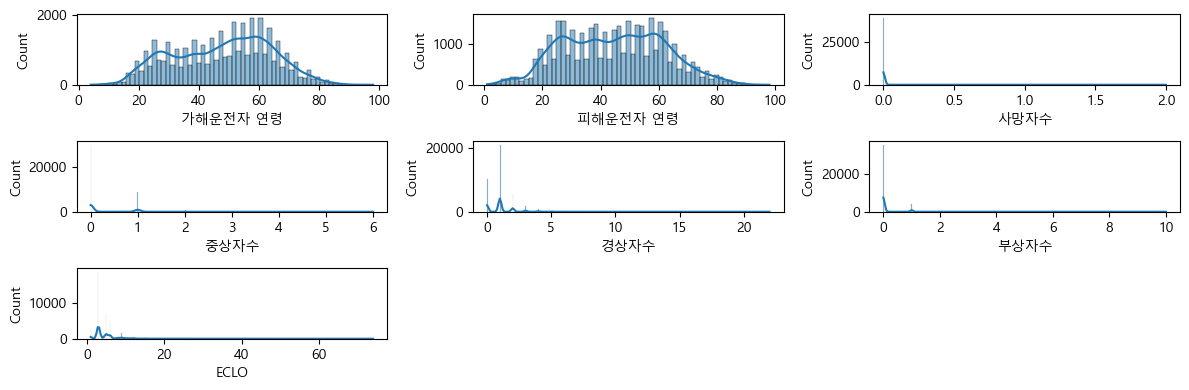

In [145]:
# 수치적 특성
#문자열 데이터가 아닌 칼럼만 모인 리스트 num_cols를 이용해서 각 컬럼별 분포를 확인
import matplotlib.pyplot as plt
import seaborn as sns
num_cols = train.select_dtypes(exclude='object').columns.to_list()
plt.figure(figsize=(12,4))

for i,col in enumerate(num_cols):    
    plt.subplot(3,3,i+1)
    sns.histplot(train[col],kde=True )
plt.tight_layout()

In [146]:
# 범주형 데이터 확인
category_cols = train.select_dtypes(include='object').columns[2:]

In [147]:
# 사고지역(구, 동)과 인명피해 심각도 ELCO 관계탐색
# 구별 상위 10개, 동별 상위 10개 => nalrgest(10)
# 구, 동 컬럼 만들기
train['구'] = train['시군구'].str.split(" ", expand=True)[1] #공백을 기준으로 나눈 후 슬라이싱
train['동'] = train['시군구'].str.split(" ",expand=True)[2]

display( train.groupby(['구'])['ECLO'].mean().nlargest(10) )
display( train.groupby(['동'])['ECLO'].mean().nlargest(10) )


구
달성군    5.072280
동구     4.889534
서구     4.775680
수성구    4.727300
북구     4.687669
남구     4.623681
달서구    4.618441
중구     4.541610
Name: ECLO, dtype: float64

동
노곡동    10.333333
덕곡동     9.875000
대안동     9.333333
내동      8.400000
하서동     8.000000
진인동     7.823529
둔산동     7.571429
조야동     7.120000
송정동     7.071429
도남동     7.000000
Name: ECLO, dtype: float64

<Axes: xlabel='가해운전자 연령', ylabel='법규위반'>

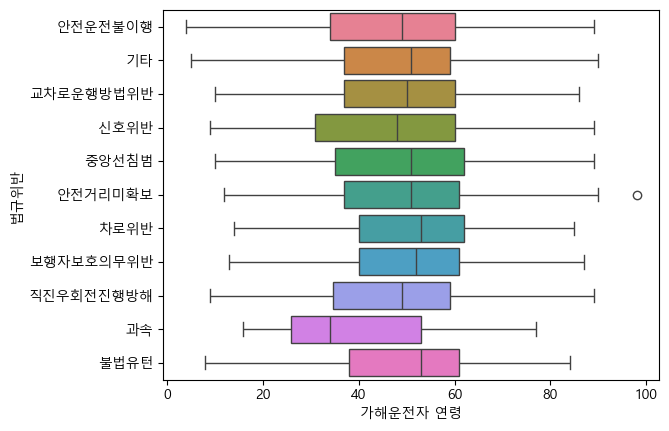

In [148]:
# '가해 운전자 연령'과 '법규위반 유형' 간의 관계 boxplot
sns.boxplot(data=train, x='가해운전자 연령', y='법규위반', hue='법규위반')

<Axes: xlabel='가해운전자 연령', ylabel='ECLO'>

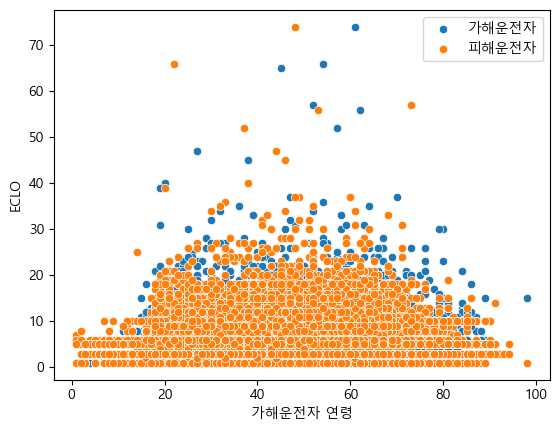

In [149]:
# '가해운전자 연령', '피해운전자 연령'과 '인명 피해 심각도(ECLO)'의 관계 분석
# 가설: 가해운전자 또는 피해운전자의 연령이 높을수록 ECLO도 높다.

sns.scatterplot(data=train, x='가해운전자 연령', y='ECLO', label='가해운전자')
sns.scatterplot(data=train, x='피해운전자 연령', y='ECLO', label='피해운전자')

# 나이와 ECLO는 관계없음

In [150]:
# 타켓변수 ECLO에 대한 연도, 월 시간별 시계열 그래프 확인 분석
# 가설1) [연도] 연도가 증가할 수록 ECLO가 낮다
# 가전2) [일] 공휴일에는 ECLO가 낮다
# 가설3) [시간대] 출퇴근 시간에는 ECLO가 높다

# '사고일시' 컬럼에서 연도, 월, 일, 시간을 분류해 추가하기 
train['사고일시'] = pd.to_datetime(train['사고일시'])

train['연도'] = train['사고일시'].dt.year
train['월'] = train['사고일시'].dt.month
train['일'] = train['사고일시'].dt.day
train['시간'] = train['사고일시'].dt.hour


In [151]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID           39609 non-null  object        
 1   사고일시         39609 non-null  datetime64[ns]
 2   요일           39609 non-null  object        
 3   기상상태         39609 non-null  object        
 4   시군구          39609 non-null  object        
 5   도로형태         39609 non-null  object        
 6   노면상태         39609 non-null  object        
 7   사고유형         39609 non-null  object        
 8   사고유형 - 세부분류  39609 non-null  object        
 9   법규위반         39609 non-null  object        
 10  가해운전자 차종     39609 non-null  object        
 11  가해운전자 성별     39609 non-null  object        
 12  가해운전자 연령     38615 non-null  float64       
 13  가해운전자 상해정도   39609 non-null  object        
 14  피해운전자 차종     38618 non-null  object        
 15  피해운전자 성별     38618 non-null  object        
 16  피해운전

<Axes: xlabel='시간', ylabel='ECLO'>

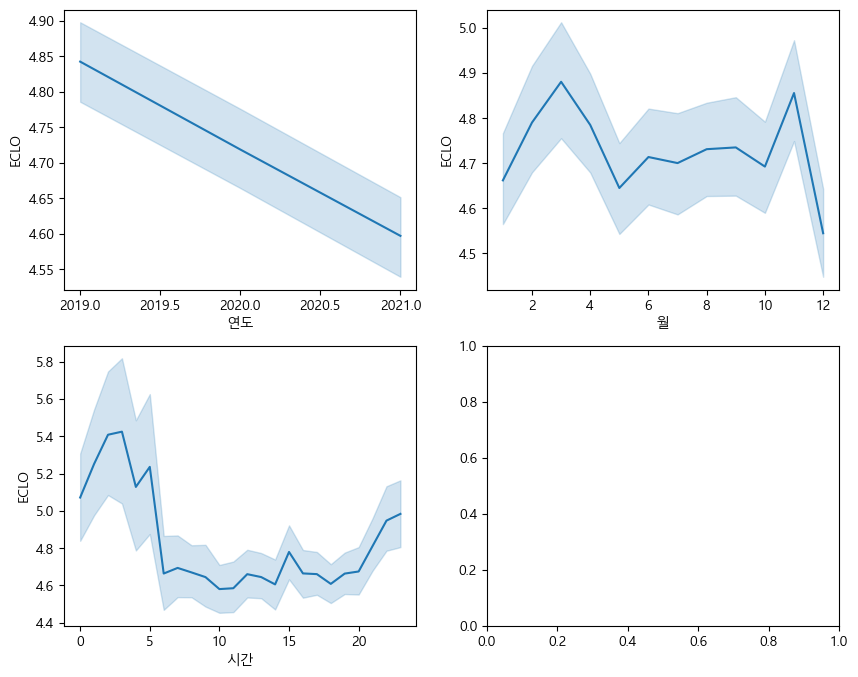

In [152]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.lineplot(data=train, x='연도', y='ECLO', ax=axes[0,0])
sns.lineplot(data=train, x='월', y='ECLO', ax=axes[0,1])
sns.lineplot(data=train, x='시간', y='ECLO', ax=axes[1,0])

c:\python_src\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()


<Axes: >

c:\python_src\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  func(*args, **kwargs)
c:\python_src\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


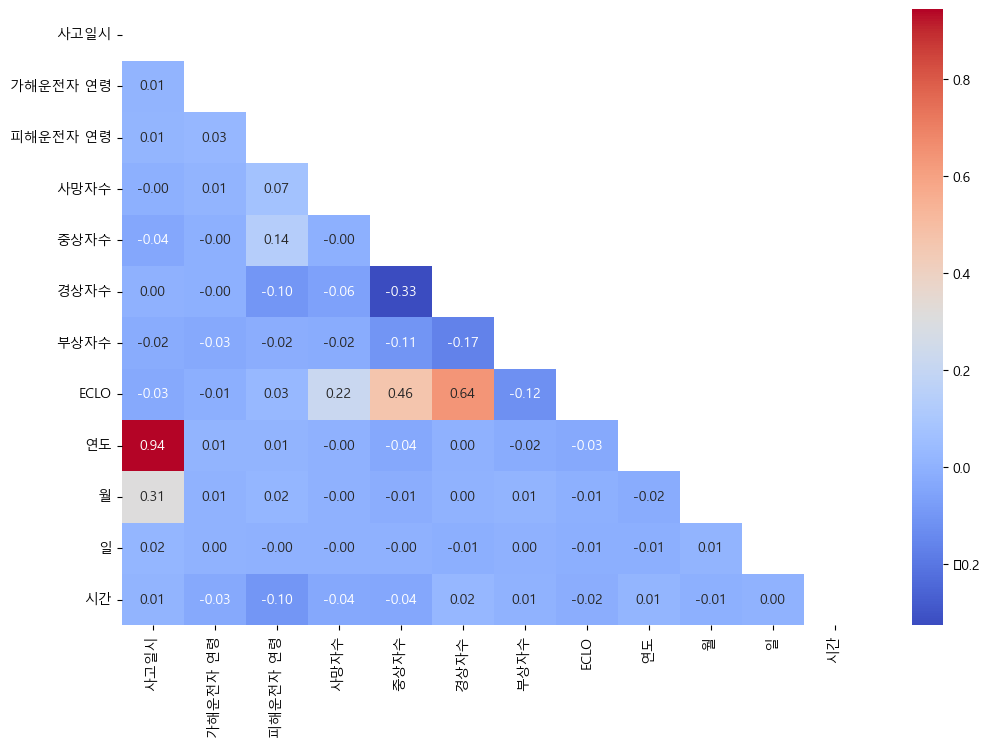

In [153]:
# 상관관계  heatmap
plt.figure(figsize=(12,8))
# 상관관계 행렬
corr = train.select_dtypes(exclude='object').corr()

# 상삼각형 mask 만들기
mask = np.triu(np.ones_like(corr, dtype=bool))

# 히트맵 출력
sns.heatmap(
    corr,
    mask=mask,        # 삼각형 제거
    annot=True,       # 수치 표시
    cmap='coolwarm',  # 색상 맵
    fmt='.2f'         # 소수점 둘째 자리까지 표시
)

## 데이터 전처리 및 피쳐 엔지니어링

In [154]:
test = pd.read_csv('./extracted_files/open/test.csv')

time_pattern = r'(\d{4})-(\d{1,2})-(\d{1,2}) (\d{1,2})'

train['사고일시'] = pd.to_datetime(train['사고일시'])
test['사고일시'] = pd.to_datetime(test['사고일시'])

train['연도'] = train['사고일시'].dt.year
train['월'] = train['사고일시'].dt.month
train['일'] = train['사고일시'].dt.day
train['시간'] = train['사고일시'].dt.hour

test['연도'] = test['사고일시'].dt.year
test['월'] = test['사고일시'].dt.month
test['일'] = test['사고일시'].dt.day
test['시간'] = test['사고일시'].dt.hour

train_df = train.drop(columns=['사고일시'])
test_df = test.drop(columns=['사고일시'])

In [155]:
# 위치 특성 추출: ELCO가 높은 '시군구'가 있다는 것을 확인
local_pattern = r'(\S+) (\S+) (\S+)' #서울시 강남구 대치동
train_df[['도시','구','동']] = train['시군구'].str.extract(local_pattern)
train_df = train_df.drop(columns=['시군구'])


In [156]:
test_df[['도시','구','동']] = test['시군구'].str.extract(local_pattern)
test_df = test_df.drop(columns=['시군구'])

In [157]:
train_df['도로형태']

0               단일로 - 기타
1               단일로 - 기타
2               단일로 - 기타
3               단일로 - 기타
4               단일로 - 기타
              ...       
39604         교차로 - 교차로안
39605           단일로 - 기타
39606         교차로 - 교차로안
39607            기타 - 기타
39608    단일로 - 지하차도(도로)내
Name: 도로형태, Length: 39609, dtype: object

In [158]:
road_pattern = r'(.+) - (.+)'

train_df[['도로형태1','도로형태2']] = train_df['도로형태'].str.extract(road_pattern)
train_df = train_df.drop(columns=['도로형태'])

In [159]:
test_df[['도로형태1','도로형태2']] = test_df['도로형태'].str.extract(road_pattern)
test_df = test_df.drop(columns=['도로형태'])

In [160]:
train_df.head(3)

,ID,요일,기상상태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,...,ECLO,구,동,연도,월,일,시간,도시,도로형태1,도로형태2
0,ACCIDENT_00000,화요일,맑음,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51.0,...,5,중구,대신동,2019,1,1,0,대구광역시,단일로,기타
1,ACCIDENT_00001,화요일,흐림,건조,차대사람,보도통행중,기타,승용,남,39.0,...,3,달서구,감삼동,2019,1,1,0,대구광역시,단일로,기타
2,ACCIDENT_00002,화요일,맑음,건조,차대사람,차도통행중,안전운전불이행,승용,남,70.0,...,3,수성구,두산동,2019,1,1,1,대구광역시,단일로,기타


In [161]:
test_df.head()

,ID,요일,기상상태,노면상태,사고유형,연도,월,일,시간,도시,구,동,도로형태1,도로형태2
0,ACCIDENT_39609,토요일,맑음,건조,차대사람,2022,1,1,1,대구광역시,수성구,상동,교차로,교차로안
1,ACCIDENT_39610,토요일,맑음,건조,차대사람,2022,1,1,1,대구광역시,수성구,지산동,단일로,기타
2,ACCIDENT_39611,토요일,맑음,건조,차대차,2022,1,1,4,대구광역시,수성구,수성동2가,교차로,교차로안
3,ACCIDENT_39612,토요일,맑음,건조,차대차,2022,1,1,4,대구광역시,수성구,신매동,단일로,기타
4,ACCIDENT_39613,토요일,맑음,건조,차대차,2022,1,1,6,대구광역시,달서구,감삼동,교차로,교차로안


In [162]:
pattern = r'\d+'
train_df['가해운전자 연령']

0        51.0
1        39.0
2        70.0
3        49.0
4        30.0
         ... 
39604    52.0
39605    60.0
39606    60.0
39607    40.0
39608    27.0
Name: 가해운전자 연령, Length: 39609, dtype: float64

In [163]:
# 지역별 평균 연령 추출 및 데이터 병합
# '가해운전자 연령'과 '피해운전자 연령'의 평균을 *지역별*로 계산 -> 원본 데이터와 병합 

age_mean = train_df[['도시','구','동','가해운전자 연령','피해운전자 연령']].groupby(['도시','구','동']).mean()
age_mean.columns = ['가해운전자 평균연령', '피해운전자 평균연령']

train_df = pd.merge(train_df, age_mean, how='left', on=['도시','구','동'])
train_df.head(2)

,ID,요일,기상상태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,...,동,연도,월,일,시간,도시,도로형태1,도로형태2,가해운전자 평균연령,피해운전자 평균연령
0,ACCIDENT_00000,화요일,맑음,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51.0,...,대신동,2019,1,1,0,대구광역시,단일로,기타,52.714286,48.015504
1,ACCIDENT_00001,화요일,흐림,건조,차대사람,보도통행중,기타,승용,남,39.0,...,감삼동,2019,1,1,0,대구광역시,단일로,기타,47.176383,42.906767


In [164]:
# 성별) 남자:1, 여자:0
train_df['가해운전자 성별'] = train_df['가해운전자 성별'].map({'남':1, '여':0})
train_df['피해운전자 성별'] = train_df['피해운전자 성별'].map({'남':1, '여':0})

In [165]:
# 지역별 평균 성별
gender_mean = train_df[['도시','구','동','가해운전자 성별','피해운전자 성별']].groupby(['도시','구','동']).mean()
gender_mean.columns = ['가해운전자 평균성별','피해운전자 평균성별']

train_df = pd.merge(train_df, gender_mean, how='left', on=['도시','구','동'])
train_df.head(2)

,ID,요일,기상상태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,...,월,일,시간,도시,도로형태1,도로형태2,가해운전자 평균연령,피해운전자 평균연령,가해운전자 평균성별,피해운전자 평균성별
0,ACCIDENT_00000,화요일,맑음,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,0.0,51.0,...,1,1,0,대구광역시,단일로,기타,52.714286,48.015504,0.753968,0.604651
1,ACCIDENT_00001,화요일,흐림,건조,차대사람,보도통행중,기타,승용,1.0,39.0,...,1,1,0,대구광역시,단일로,기타,47.176383,42.906767,0.744395,0.732331


In [ ]:
# 토요일,일요일:1, 나머지:0

train_df['주말'] = train_df['요일'].apply(lambda x: 1 if x in ['토요일', '일요일'] else 0)
test_df['주말'] = test_df['요일'].apply(lambda x: 1 if x in ['토요일', '일요일'] else 0)


In [174]:
# 지역별 사고 유형에 따른 차량 종류의 위험도 산출 및 데이터 병합
# 사고 유형과 차종별 사고 빈도는 지역별로 각기 다른 특성을 가진다. ->ECLO의 주요 요인

# 파생변수: (가해운전자 차종의 ECLO)*(가해운전자 차종 건수) => 차종별 위험도 파생변수
ride_dangerous = train_df[['가해운전자 차종','ECLO']].groupby('가해운전자 차종').mean()
ride_dangerous.columns = ['ride_dangerous']

ride_count = train_df[['도시','구','가해운전자 차종']]
ride_count['count']=1
ride_count = ride_count.groupby(['도시','구','가해운전자 차종']).count().reset_index()

temp_1 = pd.merge(train_df, ride_count, how='left', on=['가해운전자 차종'])
temp_1['multiply'] = temp_1['count']*temp_1['ride_dangerous']

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16980\237974507.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ride_count['count']=1


KeyError: 'ride_dangerous'